# Explore datasets

In [1]:
#Change root directory to the project root
#This is necessary to import modules from the project
#without having to install them

import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/all_hairpins_local.csv')

df = df[np.abs(df.handedness_magnitude) > 0.75]
df

,Chain,strand1_start_idx,strand1_end_idx,strand2_start_idx,strand2_end_idx,strand1_start_res,strand1_end_res,strand2_start_res,strand2_end_res,loop_len,HairpinSequence,LoopSequence,FullChainSequence,PDB,handedness,handedness_magnitude
1,A,48,54,57,60,49,55,58,61,2,MQANVGEGDWKGC,GD,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,5d8v,L,-0.873705
2,A,67,69,73,74,68,70,74,75,3,LINVNGWC,VNG,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,5d8v,L,-0.978780
3,A,73,74,79,80,74,75,80,81,4,WCASWTLK,ASWT,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,5d8v,L,-0.955260
5,A,11,13,18,19,11,13,18,19,4,IYDEDAGDP,EDAG,MAKWVCKICGYIYDEDAGDPDNGISPGTKFEELPDDWVCPICGAPK...,5nw3,L,-0.996633
8,A,10,11,15,16,11,12,16,17,3,IPINTAL,INT,NKASVVANQLIPINTALTLIMMKAEVVTPMGIPAEEIPKLVGMQVN...,1ucs,L,-0.992940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117730,C,40,50,53,65,455,465,468,480,2,KKVSVYQDVIVDGKVMATNLLSETVV,DG,SEFTTKERKVEEALPIKEEIRYDASLPLGKSYLLQEGKAGKKVSVY...,4fzq,L,-0.932316
117735,D,40,50,53,65,455,465,468,480,2,KKVSVYQDVIVDGKVMATNLLSETVV,DG,SEFTTKERKVEEALPIKEEIRYDASLPLGKSYLLQEGKAGKKVSVY...,4fzq,L,-0.940423
117740,E,40,50,53,65,455,465,468,480,2,KKVSVYQDVIVDGKVMATNLLSETVV,DG,SEFTTKERKVEEALPIKEEIRYDASLPLGKSYLLQEGKAGKKVSVY...,4fzq,L,-0.949146
117745,F,40,50,53,65,456,466,469,481,2,KKVSVYQDVIVDGKVMATNLLSETVV,DG,SEFTTKERKVEEALPIKEEIRYDASLPLGKSYLLQEGKAGKKVSVY...,4fzq,L,-0.928319


### What sequence is most common in beta-hairpin loops?

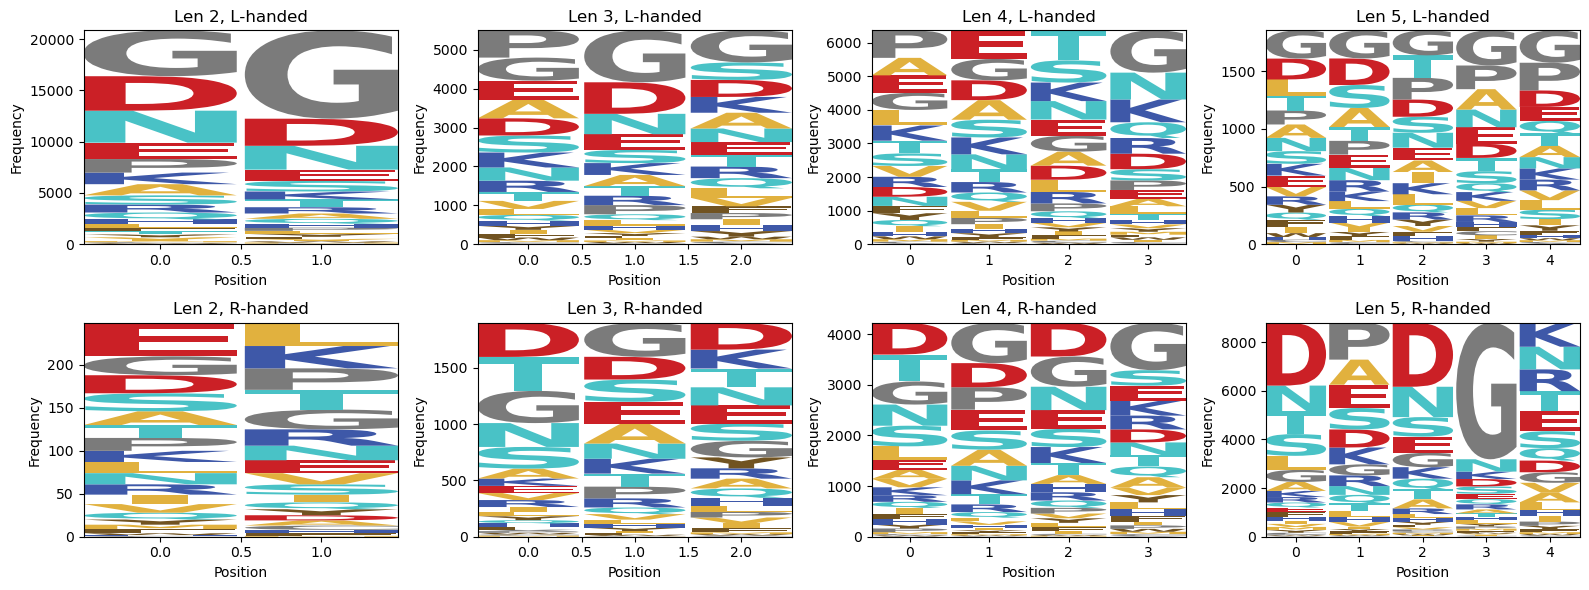

In [38]:
import logomaker
import matplotlib.pyplot as plt

# Define your grouped color scheme
grouped_colors = {
    '#e1b13e': 'MILAV',
    '#49c2c6': 'STNQ',
    '#cb2026': 'DE',
    '#3e58a8': 'KRH',
    '#715321': 'FYW',
    '#7b7b7b': 'GPCX'
}
aa_color_dict = {
    aa: color for color, aas in grouped_colors.items() for aa in aas
}

# Set up the grid: 2 rows (L/R) x 4 columns (loop lengths)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
loop_lengths = [2, 3, 4, 5]
handednesses = ['L', 'R']

for row_idx, handedness in enumerate(handednesses):
    for col_idx, looplength in enumerate(loop_lengths):
        ax = axes[row_idx, col_idx]
        df_filtered = df[(df['handedness'] == handedness) & (df['loop_len'] == looplength)]
        loop_seqs = df_filtered['LoopSequence'].dropna().astype(str).tolist()

        if loop_seqs:
            counts_mat = logomaker.alignment_to_matrix(loop_seqs)
            logo = logomaker.Logo(counts_mat, ax=ax, color_scheme=aa_color_dict)
            ax.set_title(f'Len {looplength}, {handedness}-handed')
            ax.set_xlabel('Position')
            ax.set_ylabel('Frequency')
        else:
            ax.axis('off')
            ax.set_title(f'Len {looplength}, {handedness}-handed\n(No data)')

plt.tight_layout()
plt.show()
